# Logistic Regression


---

Despite of the efficiency of the perceptron algorithm in binary classification tasks; however, the algorithm never converges when the data are not linearly seperable. Logistic regression is a supervised ML algorithm that is used in binary classification problems. The algorithm converts the linear model predictions into a probability between 0 and 1. For better understanding of this algorithm, let us recall the odds ratio, which is the odds in favour of a particular event to occur. The odds ratio can be formulated as $\frac{p}{1-p}$, where $p$ is the probability of a positive event (the event that we want to predict e.g. $y = 1$). Let us now extend our previous discussion and define the logit function, which is simply the logarithm of the odds ratio (log-odds) given by the following equation:

\begin{equation}
logit(p) = \log \left(\frac{p}{1-p}\right)
\end{equation}

As $p$ is a probability, the logit function takes a value between 0 and 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds.

\begin{equation}
logit\left(p\left(y=1|\mathbf{x}\right)\right)=w_0x_0 + w_1x_1 + \ldots + w_nx_n = \sum_{i=0}^{n} w_nx_n
\end{equation}

Hence, $p\left(y=1|\mathbf{x}\right)$ is the probability of a sample point that belongs to class 1 given its features $x$. However, in the learning process, we are more interested in the opposite case such that predicting the probability that a certain sample belongs to a particular class, which is simply the inverse of the logit function. The inverse of the logit function is called the $logistic$ function (also know as $Sigmoid$ function). The Sigmoid function is given by the equation below:

\begin{equation}
\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Hence, $z$ is the net input, that is, the linear combination of weights and sample features such that $z = \sum_{i=0}^{n} w_nx_n$. The Sigmoid function can be further visualised and plotted using the figure below:

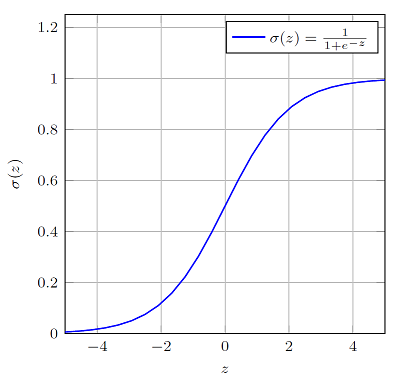

From the figure above we can observe that the Sigmoid function is bouned between 0 and 1. Such that if $z$ goes toward infinity ($z \to \infty$) then $\sigma(z)=\frac{1}{1+e^{-\infty}}=1$, and on the other hand when $z$ goes toward minus infinity ($z \to -\infty$) then $\sigma(z)=\frac{1}{1+e^{\infty}}=0$. Thus, we conclude that sigmoid function takes real number values as input and transforms them to values in the range [0,1] with $\sigma(0) = 0.5$.

In logistic regression, the activation function simply becomes the sigmoid function that we defined earlier, which is illustrated in the following figure:

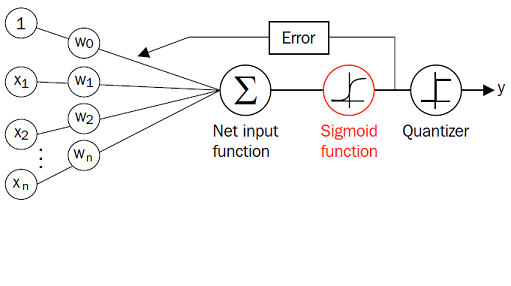

The output of the Sigmoid activation function is interpreted as the probability of particular sample belonging to class 1 $\sigma(z)=p\left(y=1|\mathbf{x,w}\right)$ given set of features $x$ and set of weights $w$. For instance, assume we have a binary classifier to classify samples of Iris-Versicolor ($y=1$) vs. Iris-Setosa ($y=0$). Then if we compute $\sigma(z)=0.9$, it means that the chance that this sample is an Iris-Versicolor flower is $90\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p\left(y=0|\mathbf{x,w}\right) = 1 - p\left(y=1|\mathbf{x,w}\right) = 0.1$ or $10\%$. The predicted probability can be converted into a binary outcome via a quantizer (unit step function):

\begin{equation}
y_{pred} = \begin{cases}
      1 & \sigma(z)\geq 0.5 \\
      0 & otherwise
   \end{cases}
\end{equation}


So far we have discussed how Logistic regression makes predictions, but we did not talk about the cost function and learning process. Unlike the case in linear regression where we used MSE cost function, in logistic regression we use log-loss (also known as binary cross entropy (BCE)), given by the equation below:

\begin{equation}
    J(w)=\frac{1}{N}\sum -y_{n}\cdot\log\left(y_{pred}\right)-\left(1-y\right)\cdot\log\left(1-y_{pred}\right)
\end{equation}
where $y_{n}$ is the label  for training example $n$, $y_{pred}$ is the predicted class.


For more information why we chose BCE over MSE, please refer to the lecture notes

Our main aim is to minimise our BCE cost function in order to get accurate predictions. In order to do that, we keep updating the parameter $w$ in the direction that minimises the cost function. The amount of change that we modify $w$ is called the gradient and is given by differentiating the cost function with respect to $w$. We can control how fast this gradient step is moving by introducing the learning rate ($\alpha$). This process is called Gradient Descent and is illustrated in the figure below:

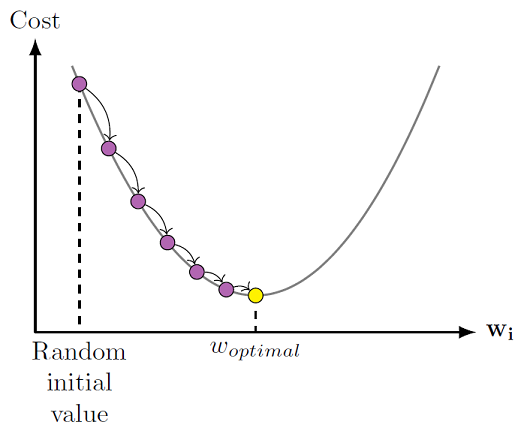


Reference:
"Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015


# Data Used & Problem Definition

We will use logistic regression as a binary classifier between Setosa vs other classes (verginica and versicolor grouped together). Here we say that data points with features that result in output probabilities closer to 0 are likely Setosa, while values closer to 1 are likely not Setosa. For simplicity, we will consider two features, petal length and sepal length, which can be visualised in a 2D plot.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

In [50]:
iris = datasets.load_iris()

In [51]:
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

In [52]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

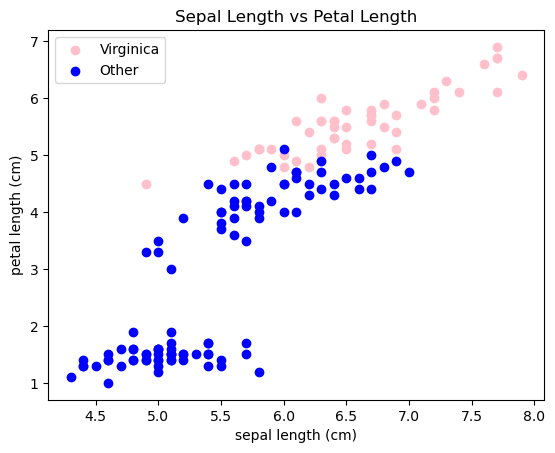

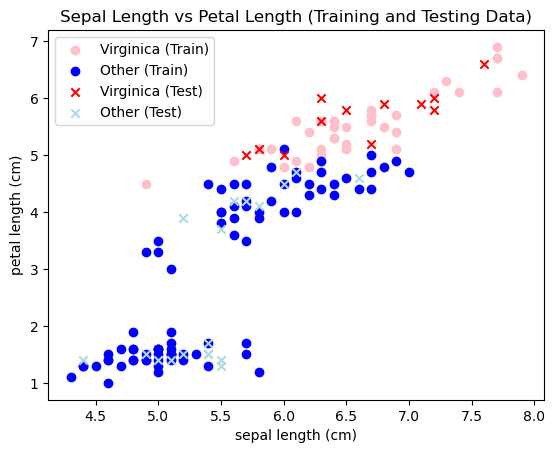

In [54]:
# Target labels are the index in iris.target_names
labels = iris_data.iloc[:,4]

# virginica is assigned label 0, while all other classes will have a label of 1
y = np.where(labels == 2, 0, 1)

# Consider only two features - sepal length (column 0) and petal length (column 2)
# Bias term (intercept) is added to each data point (row)
X = iris_data.iloc[:,[0,2]]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Plot features in 2D plot - sepal length (x-axis) vs petal length (y-axis)
feat1, feat2 = 'sepal length (cm)', 'petal length (cm)'
X_target = iris_data[iris_data.target==2]
X_other = iris_data[iris_data.target!=2]

plt.scatter(X_target[feat1],X_target[feat2],color='pink',marker='o',label="Virginica")
plt.scatter(X_other[feat1],X_other[feat2],color='blue',marker='o',label='Other')
plt.title("Sepal Length vs Petal Length")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Plot features in 2D plot for training data
plt.scatter(X_train[y_train == 0][:, 1], X_train[y_train == 0][:, 2], color='pink', marker='o', label="Virginica (Train)")
plt.scatter(X_train[y_train == 1][:, 1], X_train[y_train == 1][:, 2], color='blue', marker='o', label='Other (Train)')

# Plot features in 2D plot for testing data
plt.scatter(X_test[y_test == 0][:, 1], X_test[y_test == 0][:, 2], color='red', marker='x', label="Virginica (Test)")
plt.scatter(X_test[y_test == 1][:, 1], X_test[y_test == 1][:, 2], color='lightblue', marker='x', label='Other (Test)')

# Add labels and legend
plt.title("Sepal Length vs Petal Length (Training and Testing Data)")
plt.xlabel(feat1)
plt.ylabel(feat2)
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [55]:
def sigmoid(z):
    # Sigmoid function
    return 1 / (1 + np.exp(-z))

In [56]:
def cost(Y, y):
    # log-loss or Binary Cross Entropy (BCE)
    eps = 1e-15 # to avoid numerical error at log(0)
    return (-y * np.log(Y+eps) - (1 - y) * np.log(1 - Y + eps)).mean()

In [57]:
def plot_cost(loss):
    # Function for plotting the cost vs iterations.
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    # plt.savefig('plot.pdf')
    plt.show()

In [58]:
def predict(X, W):
    # Function for predicting on test data (see Task 1)
    prediction = sigmoid(np.dot(X, W))
    return prediction.round()

In [59]:
def fit(alpha, num_iter, X, y):
    # weights initialization
    W = np.zeros(X.shape[1])
    loss_list = []
    for i in range(num_iter):
        # Feed forward
        z = np.dot(X, W)
        Y = sigmoid(z)
        # Gradient
        W += alpha * (np.dot(X.T, (y-Y)) / y.size)
        loss = cost(Y, y)
        loss_list.append(loss)

        if i % 100 == 0:
            print(f'iteration: {i+1} \t', f'cost: {loss} \t', f'weights: {W} \t')
    plot_cost(loss_list)
    # This function will return the final weights as an array
    return W

iteration: 1 	 cost: 0.6931471805599435 	 weights: [0.00183333 0.008275   0.0011625 ] 	
iteration: 101 	 cost: 0.5591405204864806 	 weights: [ 0.07889953  0.22747063 -0.24117259] 	
iteration: 201 	 cost: 0.49260821665034443 	 weights: [ 0.13479295  0.36566561 -0.45038822] 	
iteration: 301 	 cost: 0.4494470173587621 	 weights: [ 0.18124765  0.4784239  -0.61779109] 	
iteration: 401 	 cost: 0.419333540911506 	 weights: [ 0.22117057  0.57351944 -0.75684473] 	
iteration: 501 	 cost: 0.39703566196484713 	 weights: [ 0.25641465  0.65591249 -0.87595124] 	
iteration: 601 	 cost: 0.3797317842326294 	 weights: [ 0.28818757  0.72884467 -0.98047605] 	
iteration: 701 	 cost: 0.36579935257121077 	 weights: [ 0.31730254  0.7945054  -1.07396814] 	
iteration: 801 	 cost: 0.3542496947725027 	 weights: [ 0.34432568  0.85442327 -1.1588608 ] 	
iteration: 901 	 cost: 0.34444947510235896 	 weights: [ 0.36966331  0.90969835 -1.23687828] 	
iteration: 1001 	 cost: 0.3359752831842729 	 weights: [ 0.39361516  0.96

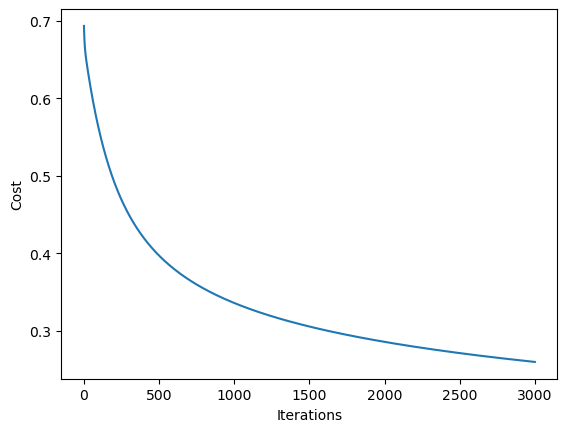

In [60]:
alpha = 0.01 #Learning Rate
num_iter = 3000

# Splitting for 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
model_weights = fit(alpha, num_iter, X_train,y_train)



In [61]:
predictions = predict(X_train, model_weights)
pred = predictions.astype('int')
true = y_train.astype('int')
print("Number of predictions:", len(predictions))


Number of predictions: 120


# Evaluation Metrics

Evaluation metrics are used to measure the performance of machine learning models. It is very important to evaluate the model after training takes place to decide whether the model can be implemented in the project or not. There are a variety of techniques used for evaluation such as classification accuracy, loss and confusion matrix. Confusion matrix is very useful tool for evaluation. It visualises the predictions for a classification problem against the real labels in table format.  Each row of the matrix represents the instances of real labels while each column represents the instances of predicted labels. The values of the confusion matrix are denoted by four categories, namely, true positive (TP), true negative (TN), false negative (FN) and false positive (FP). The outcomes of a confusion matrix can be visualised in Figure


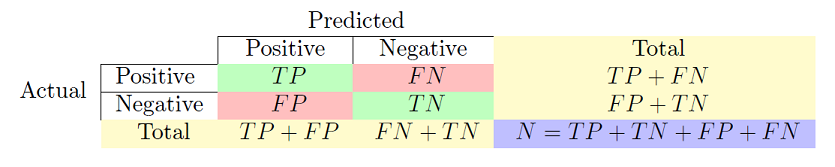

In [62]:
def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

print("Length of true:", len(true))
print("Length of pred:", len(pred))

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: Training')
print(conf_matrix)

#Calculate Confusion Matri and total accuracy.
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

Length of true: 120
Length of pred: 120
Confusion matrix result: Training
[[35.  3.]
 [ 6. 76.]]
accuracy = 92.50%


In [63]:
predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')
print("Number of predictions:", len(predictions))



Number of predictions: 30


In [64]:

predictions = predict(X_test, model_weights)
pred = predictions.astype('int')
true = y_test.astype('int')
print("Number of predictions:", len(predictions))


def compute_confusion_matrix(true, pred):

    num_cls = len(np.unique(true)) # Number of classes
    result = np.zeros((num_cls, num_cls))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

print("Length of true:", len(true))
print("Length of pred:", len(pred))

conf_matrix = compute_confusion_matrix(true, pred)
print('Confusion matrix result: Testing')
print(conf_matrix)

#Calculate Confusion Matri and total accuracy.
diagonal_sum = conf_matrix.trace()
sum_of_all_elements = conf_matrix.sum()
accuracy = diagonal_sum / sum_of_all_elements
print('accuracy = {:0.2f}%'.format(accuracy*100))

print("Final weights:", model_weights)

Number of predictions: 30
Length of true: 30
Length of pred: 30
Confusion matrix result: Testing
[[12.  0.]
 [ 0. 18.]]
accuracy = 100.00%
Final weights: [ 0.74546784  1.63378927 -2.24964811]


## Task 2 [20 marks]

In the provided code, the primary objective was to classify Iris-Setosa versus other classes. Your task is to modify the code so that it can classify Iris-Versicolor versus other classes and Iris-Virginica versus other classes separately. For each case, you should divide the dataset into training and testing subsets. Additionally, your report should cover the following aspects:

1. **Dataset Adjustment Code**: Provide the code you used to adjust the dataset for each classification scenario, ensuring that you have separate training and testing data for Iris-Versicolor versus other classes and Iris-Virginica versus other classes.

2. **Reporting Weights**: Present the final weights obtained for each classification case.

3. **Performance Comparison**: Compare the performance of the network for each classification case. Discuss any differences in performance and provide justifications for why the performance may vary between the two cases. Consider factors such as dataset characteristics and class separability.

Ensure that your code modifications are clearly documented, and your report provides insightful explanations for the observed differences in classification performance.


## Task 3 [40 marks]

In this tutorial, you were introduced to the parameter $\alpha$, also known as the learning rate. A fixed value of $0.01$ was chosen for our algorithm. Your task is to investigate the effect of selecting different values of $\alpha$ for the Iris-Setosa vs. All classifier. In your report, please cover the following aspects:

1. **Variation of $\alpha$**: Experiment with different values of $\alpha$ (e.g., 0.0001, 0.1, 1, 100). Note that you may want to print the loss more frequently to observe the initial behavior of the algorithm when using different $\alpha$ values.

2. **Code Execution**: Run the code for each of the specified $\alpha$ values and record the performance of the network for each case.

3. **Visualisation**: Include a graphical representation of the cost versus epochs for each $\alpha$ value. Additionally, report the accuracy of the test data and provide confusion matrices for each $\alpha$ value.

4. **Discussion**: In your own words, explain why the performance of the algorithm changes when using different $\alpha$ values. Discuss the effect of the learning rate on the gradient descent process, considering aspects like convergence speed, stability, and the risk of overshooting.

Ensure that your code adjustments are well-documented, and your report provides clear insights into the impact of varying the learning rate on the performance of the Iris-Setosa vs. All classifier.
